<a href="https://colab.research.google.com/github/BeforeTheStorm202/DACN/blob/main/InSDN_SHAP_whitelist_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 32.9 MB/s eta 0:00:00


In [2]:
import shap
import pandas as pd
import keras

In [3]:
# path to dataset & model
train_path = '/content/drive/MyDrive/DACN_XAI_Adv_defense/Dataset/insdn/train.csv'
test_path = '/content/drive/MyDrive/DACN_XAI_Adv_defense/Dataset/insdn/test.csv'
#fnn_model = '/content/drive/MyDrive/DACN_XAI_Adv_defense/Dataset/insdn/insdn.h5'

# Load dataset & model

In [5]:
df_train = pd.read_csv(train_path)
df_train.head(5)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.000002,0.0,5.866135e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.000001,0.0,8.603137e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.000565,0.0,5.866135e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000001,0.0,8.603137e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.000001,0.0,5.866135e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385156 entries, 0 to 385155
Data columns (total 77 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow Duration      385156 non-null  float64
 1   Tot Fwd Pkts       385156 non-null  float64
 2   Tot Bwd Pkts       385156 non-null  float64
 3   TotLen Fwd Pkts    385156 non-null  float64
 4   TotLen Bwd Pkts    385156 non-null  float64
 5   Fwd Pkt Len Max    385156 non-null  float64
 6   Fwd Pkt Len Min    385156 non-null  float64
 7   Fwd Pkt Len Mean   385156 non-null  float64
 8   Fwd Pkt Len Std    385156 non-null  float64
 9   Bwd Pkt Len Max    385156 non-null  float64
 10  Bwd Pkt Len Min    385156 non-null  float64
 11  Bwd Pkt Len Mean   385156 non-null  float64
 12  Bwd Pkt Len Std    385156 non-null  float64
 13  Flow Byts/s        385156 non-null  float64
 14  Flow Pkts/s        385156 non-null  float64
 15  Flow IAT Mean      385156 non-null  float64
 16  Fl

In [ ]:
df_train['Label'].value_counts()

2    136743
1    110033
0     76592
3     59774
4      1574
5       233
6       187
7        20
Name: Label, dtype: int64

In [ ]:
y_train = df_train.iloc[:, -1]
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 385156 entries, 0 to 385155
Series name: Label
Non-Null Count   Dtype
--------------   -----
385156 non-null  int64
dtypes: int64(1)
memory usage: 2.9 MB


In [ ]:
x_train = df_train.drop(columns=['Label'])

In [ ]:
df_test = pd.read_csv(test_path)
df_test.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.000340,0.000004,0.000117,9.493671e-07,2.803738e-07,0.000467,0.0,0.000234,0.000330,0.000467,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1
1,0.000144,0.000002,0.000176,5.379747e-07,2.183178e-05,0.000265,0.0,0.000265,0.000265,0.022541,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3
2,0.511838,0.000003,0.000205,9.493671e-07,2.803738e-07,0.000467,0.0,0.000311,0.000381,0.000467,...,0.0,0.000066,0.0,0.000066,0.000066,0.511667,0.0,0.511667,0.511667,1
3,0.001166,0.000015,0.000469,3.376582e-05,2.442710e-04,0.008048,0.0,0.002373,0.003903,0.060711,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
4,0.000001,0.000000,0.000059,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2


In [ ]:
y_test = df_test.iloc[:, -1]
y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 96289 entries, 0 to 96288
Series name: Label
Non-Null Count  Dtype
--------------  -----
96289 non-null  int64
dtypes: int64(1)
memory usage: 752.4 KB


In [ ]:
x_test = df_test.drop(columns=['Label'])

In [ ]:
import gc
del df_train, df_test

In [ ]:
gc.collect()

0

In [ ]:
#model = keras.models.load_model(fnn_model, compile=True)
#classifier = KerasClassifier(model=model_mlp, clip_values=(0, 1))

# SMOTE

In [ ]:
!pip install imbalanced-learn
#!pip install smote_variants

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
# only oversampling
def oversample_data(x, y, oversample_fraction):
    oversample = SMOTE(sampling_strategy=oversample_fraction)
    return oversample.fit_resample(x, y)

In [ ]:
# ONLY FOR SMOTE MODEL
strategy = {5:607, 6:593, 7:510} #  minority class to have 10 percent the number of examples of the majority class
x_train_smote, y_train_smote = oversample_data(x_train, y_train, strategy)

# Build detection model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
model2 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)

In [ ]:
model2.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
import joblib
# save
joblib.dump(model2, "/content/drive/MyDrive/DACN_XAI_Adv_defense/InSDN/random_forest_smote.joblib")

['/content/drive/MyDrive/DACN_XAI_Adv_defense/InSDN/random_forest_smote.joblib']

# Evaluation

In [ ]:
import seaborn as sns
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
def evaluation(y_test, y_pred):
  print('Misclassified samples: %d' % (y_test != y_pred).sum())
  result = confusion_matrix(y_test, y_pred, normalize='true')
  print("Confusion Matrix:")
  print(result)
  sns.heatmap(result, annot=True)
  result1 = classification_report(y_test, y_pred)
  print("Classification Report:",)
  print (result1)
  result2 = 100* accuracy_score(y_test, y_pred)
  print("Accuracy:", result2)
  result3 = precision_score(y_test, y_pred, average='macro')
  print("Precision:",result3)
  result4 = recall_score(y_test, y_pred, average='macro')
  print("Recall:",result4)
  result5 = f1_score(y_test, y_pred, average='macro')
  print("F1:",result5)
  #result6 = roc_auc_score(y_test, y_pred, multi_class='ovo')
  #print("AUC:",result6)

Without SMOTE

In [ ]:
y_pred = model.predict(x_test)

Misclassified samples: 1401
Confusion Matrix:
[[9.94393797e-01 2.09577701e-04 1.46704391e-03 3.92958189e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.80818747e-04 9.65608274e-01 1.04513236e-02 2.35064371e-02
  1.80818747e-04 3.61637495e-05 3.61637495e-05 0.00000000e+00]
 [8.78091614e-05 9.36631055e-04 9.98975560e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.41837969e-03 5.44135429e-03 0.00000000e+00 9.92005912e-01
  0.00000000e+00 1.34354427e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.93548387e-01 0.00000000e+00 1.86104218e-01
  6.17866005e-01 2.48138958e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.32558140e-02 0.00000000e+00 2.79069767e-01
  0.00000000e+00 6.97674419e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.48936170e-01 0.00000000e+00 1.27659574e-01
  8.51063830e-02 0.00000000e+00 6.38297872e-01 0.00000000e+00]
 [0.00000000e+00 2.85714286e-01 0.00000000e+00 4.28571429e-01
  0.00000000e+00 

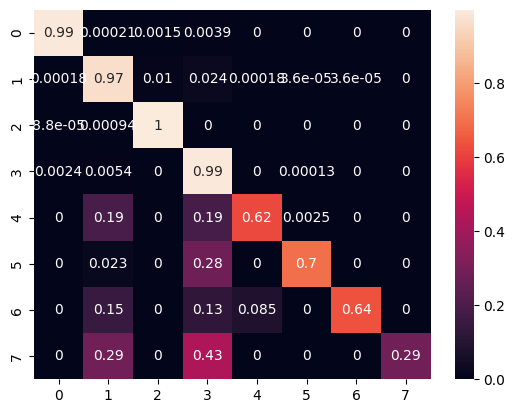

In [ ]:
evaluation(y_test, y_pred)

SMOTE

In [ ]:
y_pred2 = model2.predict(x_test)

Misclassified samples: 1396
Confusion Matrix:
[[9.94027036e-01 2.09577701e-04 1.78141046e-03 3.98197632e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.44654998e-04 9.65644438e-01 1.04874873e-02 2.35064371e-02
  1.80818747e-04 3.61637495e-05 0.00000000e+00 0.00000000e+00]
 [8.78091614e-05 9.36631055e-04 9.98975560e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.41837969e-03 5.23982265e-03 0.00000000e+00 9.92274620e-01
  0.00000000e+00 6.71772135e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.93548387e-01 0.00000000e+00 1.86104218e-01
  6.15384615e-01 4.96277916e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.79069767e-01
  0.00000000e+00 7.20930233e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.48936170e-01 0.00000000e+00 1.27659574e-01
  0.00000000e+00 0.00000000e+00 7.23404255e-01 0.00000000e+00]
 [0.00000000e+00 2.85714286e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 

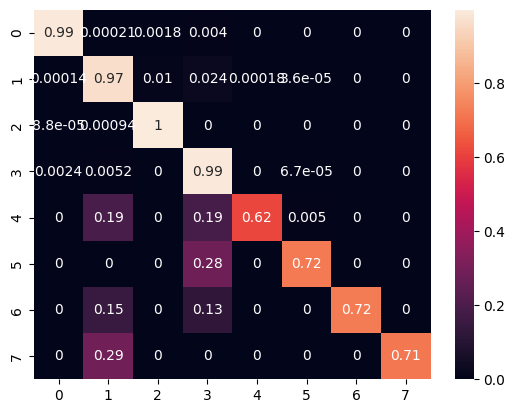

In [ ]:
evaluation(y_test, y_pred2)

## Random Grid Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
               #'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 144, 188, 233, 277, 322, 366, 411, 455, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 3, 5, 7, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_

# SHAP

In [4]:
import joblib
# load
model = joblib.load("/content/drive/MyDrive/DACN_XAI_Adv_defense/InSDN/random_forest_smote.joblib")

In [6]:
x_normal = df_train[df_train['Label'] == 0].reset_index(drop=True)

In [7]:
import gc
del df_train
gc.collect()

0

In [ ]:
x_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76592 entries, 0 to 76591
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      76592 non-null  float64
 1   Tot Fwd Pkts       76592 non-null  float64
 2   Tot Bwd Pkts       76592 non-null  float64
 3   TotLen Fwd Pkts    76592 non-null  float64
 4   TotLen Bwd Pkts    76592 non-null  float64
 5   Fwd Pkt Len Max    76592 non-null  float64
 6   Fwd Pkt Len Min    76592 non-null  float64
 7   Fwd Pkt Len Mean   76592 non-null  float64
 8   Fwd Pkt Len Std    76592 non-null  float64
 9   Bwd Pkt Len Max    76592 non-null  float64
 10  Bwd Pkt Len Min    76592 non-null  float64
 11  Bwd Pkt Len Mean   76592 non-null  float64
 12  Bwd Pkt Len Std    76592 non-null  float64
 13  Flow Byts/s        76592 non-null  float64
 14  Flow Pkts/s        76592 non-null  float64
 15  Flow IAT Mean      76592 non-null  float64
 16  Flow IAT Std       765

In [ ]:
x_normal['Label'].value_counts()

0    76592
Name: Label, dtype: int64

In [8]:
y_normal = x_normal.iloc[:, -1]
y_normal.info()

<class 'pandas.core.series.Series'>
RangeIndex: 76592 entries, 0 to 76591
Series name: Label
Non-Null Count  Dtype
--------------  -----
76592 non-null  int64
dtypes: int64(1)
memory usage: 598.5 KB


In [9]:
x_normal = x_normal.drop(columns=['Label'])

In [10]:
explainer = shap.Explainer(model)

In [11]:
shap_values = explainer(x_normal)

In [12]:
shap_values.shape

(76592, 76, 8)

76592 = the number of normal samples used

76 = the number of features

8 = the number of classes that the RF model has learned

In [ ]:
print(shap_values[0, 75, 0])

.values =
0.0009690594163614186

.base_values =
0.19813539979193948

.data =
0.0


In [ ]:
shap_values.values.shape

(76592, 76, 8)

In [ ]:
shap_values.base_values.shape

(76592, 8)

## Local

In [14]:
feature_list = x_normal.columns

In [15]:
exp = shap.Explanation(shap_values[:,:,0], shap_values.base_values[:,0], x_normal, feature_names=feature_list)
idx = 7 # datapoint to explain

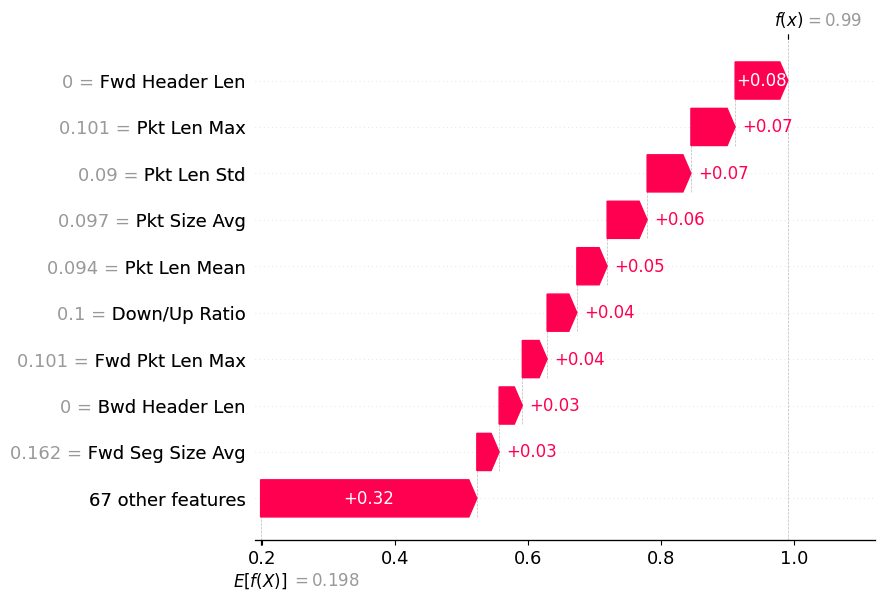

In [16]:
shap.plots.waterfall(exp[idx])

## Extract whitelist

In [27]:
feature_importance = pd.DataFrame(list(zip(feature_list, sum(shap_values.values[:,:,0]))), columns=['features', 'importance'])

In [28]:
feature_importance.head()

,features,importance
0,Flow Duration,188.754816
1,Tot Fwd Pkts,1467.121326
2,Tot Bwd Pkts,615.197928
3,TotLen Fwd Pkts,261.473886
4,TotLen Bwd Pkts,386.114768


In [29]:
feature_importance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   features    76 non-null     object 
 1   importance  76 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [30]:
feature_importance.sort_values(by=['importance'], ascending=False, inplace=True)

In [31]:
feature_importance.head(10)

,features,importance
65,Init Bwd Win Byts,7788.056630
10,Bwd Pkt Len Min,5126.645987
34,Bwd Header Len,3966.375658
33,Fwd Header Len,2800.086223
37,Pkt Len Min,2775.024720
51,Pkt Size Avg,2626.940705
50,Down/Up Ratio,2362.923693
38,Pkt Len Max,2182.530043
40,Pkt Len Std,2101.804624
36,Bwd Pkts/s,1836.398389


### Save top N feature to csv file: N = 20

In [37]:
# Convert column to list
column_list = feature_importance['features'].tolist()[:40]
print(column_list)

['Init Bwd Win Byts', 'Bwd Pkt Len Min', 'Bwd Header Len', 'Fwd Header Len', 'Pkt Len Min', 'Pkt Size Avg', 'Down/Up Ratio', 'Pkt Len Max', 'Pkt Len Std', 'Bwd Pkts/s', 'Pkt Len Mean', 'Bwd Seg Size Avg', 'Tot Fwd Pkts', 'Subflow Fwd Pkts', 'Bwd Pkt Len Max', 'Fwd Seg Size Avg', 'SYN Flag Cnt', 'Bwd Pkt Len Mean', 'Subflow Bwd Pkts', 'Fwd Pkt Len Min', 'Flow Pkts/s', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'ACK Flag Cnt', 'FIN Flag Cnt', 'Tot Bwd Pkts', 'Subflow Bwd Byts', 'Pkt Len Var', 'Bwd Pkt Len Std', 'Fwd Pkts/s', 'Flow IAT Std', 'TotLen Bwd Pkts', 'Fwd Pkt Len Std', 'Flow Byts/s', 'Flow IAT Max', 'TotLen Fwd Pkts', 'Bwd IAT Min', 'Subflow Fwd Byts', 'Flow IAT Min', 'Flow Duration']


In [38]:
# Save the list to a CSV file without index
pd.DataFrame(column_list).to_csv('/content/drive/MyDrive/DACN_XAI_Adv_defense/InSDN/top40_insdn.csv', index=False)

## Global

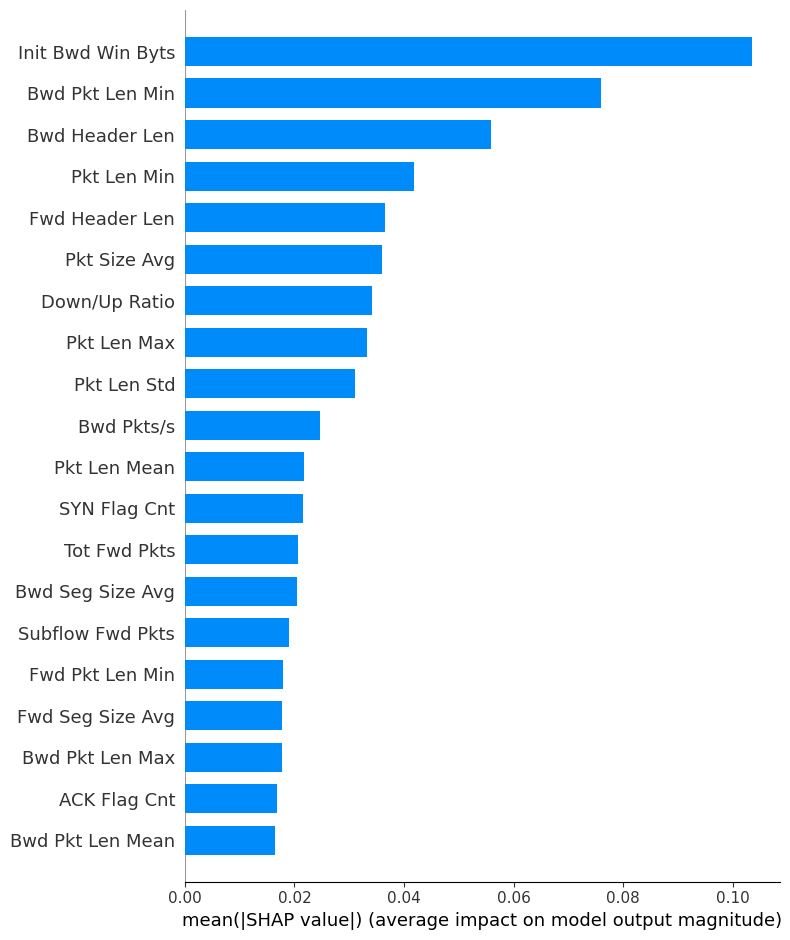

In [ ]:
shap.summary_plot(exp, x_normal, plot_type="bar", feature_names=feature_list)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


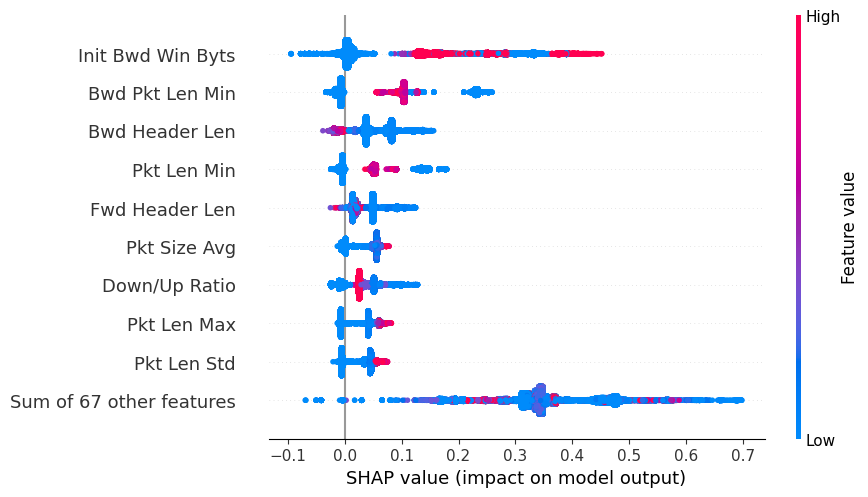

In [ ]:
shap.plots.beeswarm(exp)

# Extract local feature for each adv sample

In [ ]:
for idx in range(0, 76592):
  # Create a DataFrame with the SHAP values and feature names
  df_shap_values = pd.DataFrame({'SHAP Values': exp[idx].values}, index=feature_list)
  df_shap_values.sort_values(by=['SHAP Values'], ascending=False, inplace=True)
  df_shap_values.to_csv('/content/drive/MyDrive/DACN_XAI_Adv_defense/InSDN/Normal_local/SHAP_Samples_' + str(idx) + '.csv')
  print('Extracted local importance feature of the ' + str(idx) + ' sample.')

# Detect normal samples

In [81]:
whitelist = freq_df.iloc[:, 0][:24].tolist()
print(whitelist)

['Bwd Header Len', 'Pkt Size Avg', 'Pkt Len Max', 'Fwd Header Len', 'Pkt Len Std', 'Pkt Len Mean', 'Bwd Pkt Len Min', 'Pkt Len Min', 'Bwd Seg Size Avg', 'Down/Up Ratio', 'Init Bwd Win Byts', 'Fwd Seg Size Avg', 'Bwd Pkts/s', 'Subflow Bwd Pkts', 'Flow Pkts/s', 'Subflow Fwd Pkts', 'Tot Fwd Pkts', 'SYN Flag Cnt', 'FIN Flag Cnt', 'ACK Flag Cnt', 'Bwd Pkt Len Max', 'Fwd Pkt Len Max', 'Tot Bwd Pkts', 'Fwd Pkt Len Min']


In [41]:
whitelist = pd.read_csv('/content/drive/MyDrive/DACN_XAI_Adv_defense/InSDN/top24_InSDN.csv')
whitelist = whitelist.iloc[:, 0][:24].tolist()
print(whitelist)

['Init Bwd Win Byts', 'Bwd Pkt Len Min', 'Bwd Header Len', 'Fwd Header Len', 'Pkt Len Min', 'Pkt Size Avg', 'Down/Up Ratio', 'Pkt Len Max', 'Pkt Len Std', 'Bwd Pkts/s', 'Pkt Len Mean', 'Bwd Seg Size Avg', 'Tot Fwd Pkts', 'Subflow Fwd Pkts', 'Bwd Pkt Len Max', 'Fwd Seg Size Avg', 'SYN Flag Cnt', 'Bwd Pkt Len Mean', 'Subflow Bwd Pkts', 'Fwd Pkt Len Min', 'Flow Pkts/s', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'ACK Flag Cnt', 'FIN Flag Cnt', 'Tot Bwd Pkts', 'Subflow Bwd Byts', 'Pkt Len Var', 'Bwd Pkt Len Std', 'Fwd Pkts/s', 'Flow IAT Std', 'TotLen Bwd Pkts', 'Fwd Pkt Len Std', 'Flow Byts/s', 'Flow IAT Max', 'TotLen Fwd Pkts', 'Bwd IAT Min', 'Subflow Fwd Byts', 'Flow IAT Min', 'Flow Duration']


In [66]:
import os
import pandas as pd

# Specify the directory where the CSV files are located
directory = '/content/drive/MyDrive/DACN_XAI_Adv_defense/InSDN/Normal_local/'

# Create an empty dictionary to store the data
data_dict = {}

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        file_path = os.path.join(directory, filename)

        # Load the CSV file and extract the first column as a list
        df = pd.read_csv(file_path)
        first_column = df.iloc[:, 0][:10].tolist()

        # Add the list to the dictionary with the file name as the key
        data_dict[filename] = first_column

# Print the first data dictionary
for file_name, data_list in data_dict.items():
    print(file_name, ":", data_list)
    break

SHAP_Samples_0.csv : ['Bwd Pkt Len Min', 'Bwd Header Len', 'Pkt Size Avg', 'Fwd Header Len', 'Pkt Len Min', 'Pkt Len Std', 'Pkt Len Max', 'Pkt Len Mean', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg']


In [82]:
alert = []

# Iterate over each key-value pair in the data_dict
for key, value in data_dict.items():
    # Check if there are one feature is not in the whitelist
    for string in value:
      if string not in whitelist:
        alert.append(key)
        break

# Print the alert dictionary
print("Alert list length:" + str(len(alert)))

Alert list length:22237


## False positive of XAI on normal samples of trainset:
top 38: 3974/76592

top 24: 22237/76592

# New whitelist: 38 top features with over 10k freq each

In [70]:
df = pd.DataFrame(data_dict)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 76592 entries, SHAP_Samples_0.csv to SHAP_Samples_76591.csv
dtypes: object(76592)
memory usage: 5.8+ MB


In [72]:
df.to_csv('/content/drive/MyDrive/DACN_XAI_Adv_defense/InSDN/top10_of_each_normalfile.csv', index=False)

In [26]:
df.head()

,SHAP_Samples_0.csv,SHAP_Samples_1.csv,SHAP_Samples_2.csv,SHAP_Samples_3.csv,SHAP_Samples_4.csv,SHAP_Samples_5.csv,SHAP_Samples_6.csv,SHAP_Samples_7.csv,SHAP_Samples_8.csv,SHAP_Samples_9.csv,...,SHAP_Samples_76582.csv,SHAP_Samples_76583.csv,SHAP_Samples_76584.csv,SHAP_Samples_76585.csv,SHAP_Samples_76586.csv,SHAP_Samples_76587.csv,SHAP_Samples_76588.csv,SHAP_Samples_76589.csv,SHAP_Samples_76590.csv,SHAP_Samples_76591.csv
0,Bwd Pkt Len Min,Init Bwd Win Byts,Bwd Pkt Len Min,Bwd Pkt Len Min,Bwd Pkt Len Min,Init Bwd Win Byts,Bwd Pkt Len Min,Fwd Header Len,ACK Flag Cnt,Pkt Len Std,...,Bwd Pkt Len Min,Init Bwd Win Byts,Init Bwd Win Byts,Bwd Pkt Len Min,Init Bwd Win Byts,Bwd Pkt Len Min,Init Bwd Win Byts,Bwd Pkt Len Min,Init Bwd Win Byts,Init Bwd Win Byts
1,Bwd Header Len,Bwd Pkts/s,Pkt Len Min,Pkt Len Min,Bwd Header Len,Bwd Pkts/s,Bwd Header Len,Pkt Len Max,Bwd Pkts/s,Fwd Header Len,...,Bwd Header Len,Bwd Header Len,Fwd Header Len,Bwd Header Len,Fwd Header Len,Bwd Header Len,Pkt Len Max,Pkt Len Min,Down/Up Ratio,ACK Flag Cnt
2,Pkt Size Avg,Flow Pkts/s,Fwd Pkt Len Min,Fwd Pkt Len Min,Pkt Size Avg,Down/Up Ratio,Pkt Size Avg,Pkt Len Std,Flow Pkts/s,Pkt Size Avg,...,Pkt Size Avg,ACK Flag Cnt,Pkt Size Avg,Pkt Size Avg,Pkt Len Max,Pkt Size Avg,Pkt Size Avg,Fwd Pkt Len Min,Bwd Pkts/s,Bwd Header Len
3,Fwd Header Len,Bwd Header Len,Down/Up Ratio,Bwd Pkts/s,Fwd Header Len,Bwd Header Len,Fwd Header Len,Pkt Size Avg,Bwd Header Len,Pkt Len Max,...,Pkt Len Min,Bwd Pkts/s,Pkt Len Max,Pkt Len Min,Pkt Size Avg,Pkt Len Min,Pkt Len Std,Down/Up Ratio,ACK Flag Cnt,FIN Flag Cnt
4,Pkt Len Min,Subflow Bwd Pkts,Bwd Pkts/s,Down/Up Ratio,Pkt Len Min,Flow Pkts/s,Pkt Len Min,Pkt Len Mean,FIN Flag Cnt,Bwd Header Len,...,Fwd Header Len,Flow Pkts/s,Bwd Header Len,Fwd Header Len,Pkt Len Std,Fwd Header Len,Tot Fwd Pkts,Bwd Pkts/s,Bwd Header Len,Flow Pkts/s


In [73]:
freq = {}
for column in df.columns:
  for feature in df[column]:
    if feature in freq:
      continue
    else:
      count = sum(df[column_2] == feature for column_2 in df.columns)
      freq[feature] = count.sum()
      print(freq[feature])

39930
60910
48472
47441
38137
46926
48112
42886
28154
37411
34754
27404
24526
27267
13000
16891
4212
2440
10501
36935
15927
14931
6272
14387
22331
15463
1748
208
22413
2826
2109
2143
1683
1658
481
624
1301
2223
214
117
105
14
37
54
162
102
15
43
11
6
1
1
1


In [75]:
freq_df = pd.DataFrame(list(freq.items()), columns=['Feature', 'Frequency'])
freq_df.head()

,Feature,Frequency
0,Bwd Pkt Len Min,39930
1,Bwd Header Len,60910
2,Pkt Size Avg,48472
3,Fwd Header Len,47441
4,Pkt Len Min,38137


In [76]:
freq_df.sort_values(by=['Frequency'], ascending=False, inplace=True)
freq_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1 to 52
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Feature    53 non-null     object
 1   Frequency  53 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [79]:
freq_df.head(24)

,Feature,Frequency
1,Bwd Header Len,60910
2,Pkt Size Avg,48472
6,Pkt Len Max,48112
3,Fwd Header Len,47441
5,Pkt Len Std,46926
7,Pkt Len Mean,42886
0,Bwd Pkt Len Min,39930
4,Pkt Len Min,38137
9,Bwd Seg Size Avg,37411
19,Down/Up Ratio,36935


In [80]:
freq_df[:38].to_csv('/content/drive/MyDrive/DACN_XAI_Adv_defense/InSDN/top24_InSDN.csv', index=False)

In [62]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive
